In [1]:
#| default_exp depth

In [2]:
#| export
from transformers import GLPNFeatureExtractor, GLPNForDepthEstimation
import torch
import numpy as np
from PIL import Image
import requests

feature_extractor = GLPNFeatureExtractor.from_pretrained("vinvino02/glpn-nyu")
model = GLPNForDepthEstimation.from_pretrained("vinvino02/glpn-nyu")

In [3]:
#| export
def get_depth(image,mean_height=3.,cut_min_q=0.3):
    pixel_values = feature_extractor(image, return_tensors="pt").pixel_values


    with torch.no_grad():
        outputs = model(pixel_values)
        predicted_depth = outputs.predicted_depth

    # interpolate to original size
    prediction = torch.nn.functional.interpolate(
                        predicted_depth.unsqueeze(1),
                        size=pixel_values.shape[-2:],
                        mode="bicubic",
                        align_corners=False,
                 )
    prediction = -prediction.squeeze().cpu().numpy()
    prediction = prediction-prediction.min()
    min_ = np.quantile(prediction, cut_min_q)
    prediction = np.where(prediction<min_,min_,prediction)
    prediction = prediction-min_
    return prediction*mean_height/prediction.mean()

In [4]:
url = 'https://image.shutterstock.com/image-photo/traditional-greek-potato-meat-casserole-600w-1879491052.jpg'
image = Image.open(requests.get(url, stream=True).raw)


[300.0, 210.0]

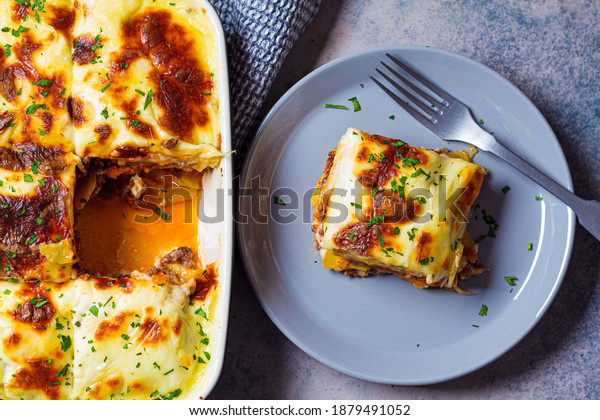

In [18]:
image.resize([int(v/1) for v in image.size])

In [19]:
p = get_depth(image,mean_height=3.,cut_min_q=0)

In [24]:
surface = np.where(p<np.quantile(p,0.5),p,np.nan)

In [ ]:
np.fillna()

In [25]:
surface

array([[1.2039729, 1.4219625, 1.3564248, ..., 1.503016 , 1.4513261,
        1.1937007],
       [1.8244629, 2.2420409, 2.3651152, ..., 2.5465498, 2.5025487,
        2.1585243],
       [1.7999408, 1.9089192, 1.9716316, ..., 2.2891443, 2.2427244,
        2.1796308],
       ...,
       [      nan,       nan,       nan, ..., 2.9996743, 3.003822 ,
        3.0212204],
       [      nan,       nan,       nan, ..., 2.9985614, 2.9438136,
        3.0383177],
       [3.046338 , 3.0716314,       nan, ..., 3.0037296, 2.98198  ,
        2.9697938]], dtype=float32)

In [33]:
from scipy import interpolate

In [37]:
np.linalg?

Type:        module
String form: <module 'numpy.linalg' from '/home/dima/anaconda3/envs/f4/lib/python3.9/site-packages/numpy/linalg/__init__.py'>
File:        ~/anaconda3/envs/f4/lib/python3.9/site-packages/numpy/linalg/__init__.py
Docstring:  
``numpy.linalg``

The NumPy linear algebra functions rely on BLAS and LAPACK to provide efficient
low level implementations of standard linear algebra algorithms. Those
libraries may be provided by NumPy itself using C versions of a subset of their
reference implementations but, when possible, highly optimized libraries that
take advantage of specialized processor functionality are preferred. Examples
of such libraries are OpenBLAS, MKL (TM), and ATLAS. Because those libraries
are multithreaded and processor dependent, environmental variables and external
packages such as threadpoolctl may be needed to control the number of threads
or specify the processor architecture.

- OpenBLAS: https://www.openblas.net/
- threadpoolctl: https://github.com/j

In [35]:
interpolate.interp2d?

Init signature:
interpolate.interp2d(
    x,
    y,
    z,
    kind='linear',
    copy=True,
    bounds_error=False,
    fill_value=None,
)
Docstring:     
interp2d(x, y, z, kind='linear', copy=True, bounds_error=False,
         fill_value=None)

Interpolate over a 2-D grid.

`x`, `y` and `z` are arrays of values used to approximate some function
f: ``z = f(x, y)`` which returns a scalar value `z`. This class returns a
function whose call method uses spline interpolation to find the value
of new points.

If `x` and `y` represent a regular grid, consider using
`RectBivariateSpline`.

If `z` is a vector value, consider using `interpn`.

Note that calling `interp2d` with NaNs present in input values results in
undefined behaviour.

Methods
-------
__call__

Parameters
----------
x, y : array_like
    Arrays defining the data point coordinates.

    If the points lie on a regular grid, `x` can specify the column
    coordinates and `y` the row coordinates, for example::

      >>> x = [0,1

In [ ]:
scipy.interpolate.interp2d(x, y, z, kind='linear', copy=True, bounds_error=False, fill_value=None)

In [27]:
A = np.array([1, np.nan, np.nan, 2, 2, np.nan, 0])

np.interp(np.arange(len(A)), 
          np.arange(len(A))[np.isnan(A) == False], 
          A[np.isnan(A) == False])

array([1.        , 1.33333333, 1.66666667, 2.        , 2.        ,
       1.        , 0.        ])

In [29]:
np.interp?

Signature: np.interp(x, xp, fp, left=None, right=None, period=None)
Docstring:
One-dimensional linear interpolation for monotonically increasing sample points.

Returns the one-dimensional piecewise linear interpolant to a function
with given discrete data points (`xp`, `fp`), evaluated at `x`.

Parameters
----------
x : array_like
    The x-coordinates at which to evaluate the interpolated values.

xp : 1-D sequence of floats
    The x-coordinates of the data points, must be increasing if argument
    `period` is not specified. Otherwise, `xp` is internally sorted after
    normalizing the periodic boundaries with ``xp = xp % period``.

fp : 1-D sequence of float or complex
    The y-coordinates of the data points, same length as `xp`.

left : optional float or complex corresponding to fp
    Value to return for `x < xp[0]`, default is `fp[0]`.

right : optional float or complex corresponding to fp
    Value to return for `x > xp[-1]`, default is `fp[-1]`.

period : None or float, opt

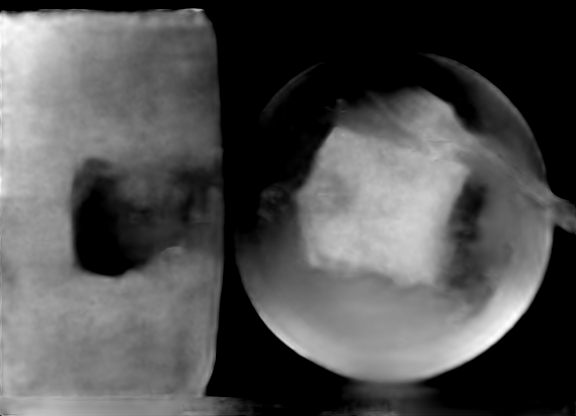

In [6]:
formatted = (prediction * 255 / np.max(prediction)).astype("uint8")
depth = Image.fromarray(formatted)
depth

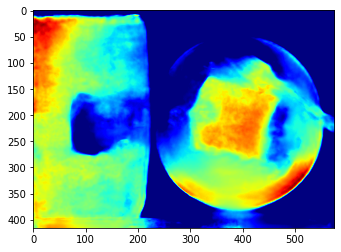

In [7]:
import matplotlib.pyplot as plt

plt.imshow(prediction, cmap="jet")

In [8]:
!conda activate f4;nbdev_build_lib

Converted 00_paths.ipynb.
Converted 00_psql.ipynb.
Converted 01_search.ipynb.
Converted bot.ipynb.
Converted depth.ipynb.
Converted inference.ipynb.
Converted search_dev.ipynb.
Converted search_segmented_stable.ipynb.
Converted stats.ipynb.
Converted usda.ipynb.
Converted usda_parsing.ipynb.
